In [2]:
# Studying the distribution of drawdowns in a simple setup
# Use log returns generated by r(t) = m(t) + s*e(t), where e(t) is N(0,1)
# Generates a long series of drawdowns to study their depth and duration distribution.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# Data Generating Process (DGP), strategy, and simulations (some options)
m = 0.0055 # we use 0.0085 nomial returns and 0.0055 for excess returns
s = 0.035 # 0.035 for sp500 (represents Standard Deviation)
lev = 0.1 # Leverage of the strategy, 1 for fully invested, 2 for 100% leverage, 0.5 for 50% in cash
bigT = 100_000 # Simulation sample size
nobsPlot = 50*12 # Plot the first 50 years of drawdown.

np.random.seed(123) # Setting the seed for random number generator

# Generating a (bigT,1) series of log returns.
r = m + s*np.random.randn(bigT) # The random variables are scaled by s(std) and shifted by mean m
                                # This ensures that the generated values have mean m and std(s).
                                # r is normally distributed with mean m and standard deviation s.
                                # Reason: Linear tranformation of normal random variable is also normal.                                
                                
# Calculating the leveraged  returns of the strategy
Rst = lev*(np.exp(r) - 1) # Converting log returns to simple returns and applying leverage.

DD = np.zeros(bigT) # Pre allocating array to store drawdowns.
DDd = np.ones(bigT) # Pre allocating array to store drawdown durations.

# If bigT is too large,  using log of total values is much more stable numericllay.
# Simple version
#V = np.cumprod(1 + Rst) # Total value of the strategy calculated by using cumulative product.
#maxV = V[0] # Initializing the maximum value of the strategy.
#for t in range(1, bigT):
#    DD[t] = min(1,V[t]/maxV)
#    maxV = max(V[t], maxV)
#    if DD[t] == 0:
#        DDd[t] = 0
#    elif DD[t] < 1:
#        DDd[t] = DDd[t-1] + 1

In [68]:
# Alternative Drawdown implementation (more stable for large bitT)
maxlogV = 0 # starting value for high log(V)
logV = np.cumsum(np.log(1+Rst)) # log wealth: log(V), but built without creating V

for t in range(1, bigT):
    DD[t] = min(1.0, np.exp(logV[t] - maxlogV)) - 1.0
    maxlogV = max(logV[t], maxlogV)

    if DD[t] == 0:
        DDd[t] = 0
    elif DD[t] < 0:
        DDd[t] = DDd[t-1] + 1

In [69]:
# Some Statistics
print("Yearly Mean, Standard Deviation, and Sharpe Ratio of log returns(assume monthly frequence)")
st = np.array([12*m, np.sqrt(12)*s, np.sqrt(12)*m/s])
print(np.round(st,3))

qv = np.array([0.01,0.05,0.10,0.50]) # some quantiles of drawdown length
qd = np.array([0.50,0.90,0.95,0.99]) # some quantiles of drawdown duration

print("Drawdown quantiles and values in %")
print(qv)
print(np.round(np.quantile(DD*100, qv),2)) # Multiplied by 100 to get percentage drawdowns

print("Drawdown duration quantiles)")
print(qd)
print(np.round(np.quantile(DDd, qd),2))

print("Share of the time spent in drawdown")
print(np.round(np.mean(DD<0), 2))

Yearly Mean, Standard Deviation, and Sharpe Ratio of log returns(assume monthly frequence)
[0.066 0.121 0.544]
Drawdown quantiles and values in %
[0.01 0.05 0.1  0.5 ]
[-4.59 -2.93 -2.17 -0.5 ]
Drawdown duration quantiles)
[0.5  0.9  0.95 0.99]
[  5.  48.  76. 159.]
Share of the time spent in drawdown
0.78


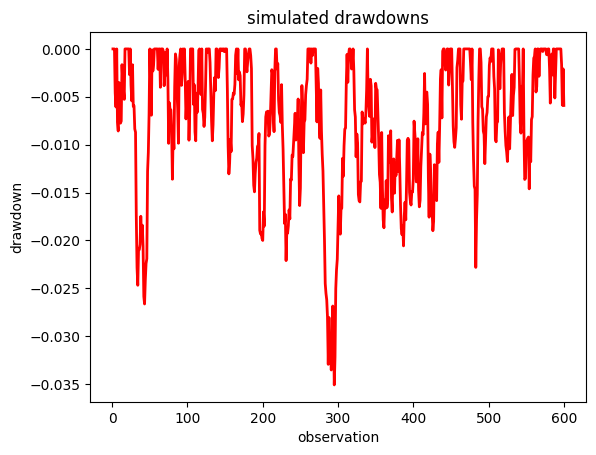

In [70]:
pt01 = "simulated drawdowns"

x = np.arange(1, nobsPlot + 1)
y = DD[:nobsPlot]

plt.figure()
plt.plot(x, y,color='red', linewidth=2)
plt.title(pt01)
plt.xlabel("observation")
plt.ylabel("drawdown")
plt.show()


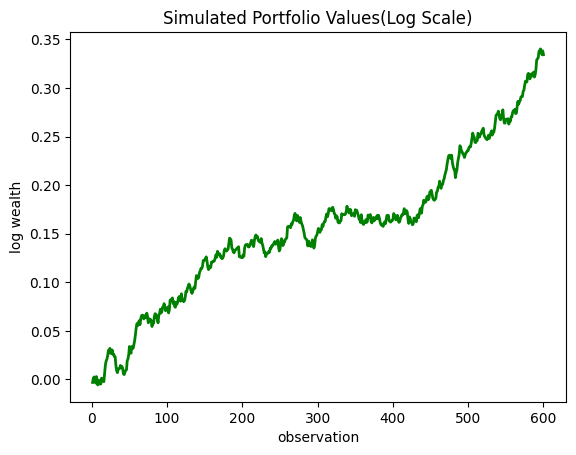

In [71]:
pt02 = "Simulated Portfolio Values(Log Scale)"

x = np.arange(1, nobsPlot + 1)
y = logV[:nobsPlot]

plt.figure()
plt.plot(x, y,color='green', linewidth=2)
plt.title(pt02)
plt.xlabel("observation")
plt.ylabel("log wealth")
plt.show()